<a href="https://colab.research.google.com/github/michaelodwyer77/MScResearch/blob/main/MScResearch_Final_OnePipeline_ManyClassifiers_lite_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification with Naive Bayes, Logistic Regression, SVM

**Overview:** This notebook aims to give you a brief overview of performing text classification using Naive Bayes, Logistic Regression and Support Vector Machines. We will be using a dataset called "Economic news article tone and relevance" from [Figure-Eight](https://github.com/practical-nlp/practical-nlp/blob/master/Ch4/Data/Full-Economic-News-DFE-839861.csv) which consists of approximately 8000 news articles, which were tagged as relevant or not relevant to the US Economy. Our goal in this notebook is to explore the process of training and testing text classifiers for this problem, using this data set and two text classification algorithms: Multinomial Naive Bayes and Logistic Regression, implemented in sklearn.

##### Dataset Link: In the a folder called Data in folder Ch4 of this repo
<br><br>
Let's import few necessary packages before we start our work

In [1]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install numpy==1.19.5
!pip install pandas==1.1.5
!pip install scikit-learn==0.21.3
#!pip install matplotlib==3.2.2
!pip install matplotlib==3.5.0rc1

# ===========================

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 46.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = re

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

try:
    import google.colab
    !curl  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/ch4-requirements.txt | xargs -n 1 -L 1 pip install
except ModuleNotFoundError:
    !pip install -r "ch4-requirements.txt"

# ===========================

xargs: warning: options --max-args and -L are mutually exclusive, ignoring previous --max-args value
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   340  100   340    0     0    805      0 --:--:-- --:--:-- --:--:--   803
  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached pandas-1.1.5.tar.gz (5.2 MB)
  Installing build dependencies ...

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text # Import the text submodule

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [2]:
import pandas as pd

chunk_size = 1000  # Adjust this if necessary
problematic_row_num = 1018  # From the error message

for i, chunk in enumerate(pd.read_csv('vehicles_lite.csv', encoding='utf-8', chunksize=chunk_size)):
    if i * chunk_size <= problematic_row_num < (i + 1) * chunk_size:
        print(chunk.iloc[problematic_row_num - i * chunk_size])  # Print the row causing the issue
        break

id                                                     7307662982
url             https://bham.craigslist.org/ctd/d/tuscaloosa-2...
region                                                 birmingham
region_url                            https://bham.craigslist.org
price                                                       42977
year                                                       2017.0
manufacturer                                        mercedes-benz
model                                                       e 400
condition                                                     NaN
cylinders                                                     NaN
fuel                                                          gas
odometer                                                  35268.0
title_status                                                clean
transmission                                            automatic
VIN                                             WDDKK6FF7HF360964
drive     

### Section 1: Load and explore the dataset

In [3]:
#This vehicles_lite dataset is already classifed as HIGH_PRICE, MEDIUM_PRICE
import pandas as pd
try:
    #from google.colab import files
    #!wget -P DATAPATH https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
    #!ls -lah DATAPATH
    #our_data = pd.read_csv("DATAPATH/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )
    our_data = pd.read_csv('vehicles_lite.csv',encoding='utf-8')

except ModuleNotFoundError:
    #our_data = pd.read_csv("Data/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )
    our_data = pd.read_csv('vehicles_lite.csv',encoding='utf-8')

In [4]:
print(our_data.head())

           id                                                url      region  \
0  7316878036  https://bham.craigslist.org/ctd/d/birmingham-2...  birmingham   
1  7316874816  https://bham.craigslist.org/ctd/d/birmingham-2...  birmingham   
2  7316873897  https://bham.craigslist.org/cto/d/helena-2001-...  birmingham   
3  7316872263  https://bham.craigslist.org/ctd/d/birmingham-2...  birmingham   
4  7316871664  https://bham.craigslist.org/ctd/d/birmingham-2...  birmingham   

                    region_url  price    year manufacturer  \
0  https://bham.craigslist.org  21950  2012.0       toyota   
1  https://bham.craigslist.org  13950  2011.0       toyota   
2  https://bham.craigslist.org   5900  2001.0          NaN   
3  https://bham.craigslist.org  12950  2005.0          bmw   
4  https://bham.craigslist.org  18950  2010.0         ford   

                       model  condition    cylinders  ... Unnamed: 30  \
0                 tacoma 4x4  excellent  4 cylinders  ...         NaN   


In [5]:
display(our_data.shape) # Number of rows (instances) and columns in the dataset
# Check for possible column names and adjust accordingly
print(our_data.columns) # Print all column names to verify the correct name
our_data["class_label"].value_counts()/our_data.shape[0] # Class distribution in the dataset
# Replace "class_label" with the actual name of the column containing the class labels

(1859, 40)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'class_label', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')


,count
class_label,
LOW_PRICE,0.558365
HIGH_PRICE,0.441635


There is an imbalance in the data with less **HIGH_PRICE** being 58.84% in the dataset. That is, more articles are likely HIGH_PRICE than MEDIUM_PRICE or LOW_PRICE We should keep this class imbalance mind when interpreting the classifier performance later. Let us first convert the class labels into binary outcome variables for convenience. 1 for HIGH_PRICE, and 0 for LOW_PRICE, and ignore \"Not sure\"

In [6]:
# convert label to a numerical variable
our_data = our_data[our_data.class_label != "UNKNOWN"] # removing the data where we don't want relevance="not sure".
our_data.shape
our_data['class_label'] = our_data.class_label.map({'HIGH_PRICE':1, 'LOW_PRICE':0})
our_data = our_data[["description","class_label"]] # Let us take only the two columns we need.
our_data.shape

(1859, 2)

### Section 2: Text Pre-processing

Typical steps involve tokenization, lower casing, removing, stop words, punctuation markers etc, and vectorization. Other processes such as stemming/lemmatization can also be performed. Here, we are performing the following steps: removing br tags, punctuation, numbers, and stopwords. While we are using sklearn's list of stopwords, there are several other stop word lists (e.g., from NLTK) or sometimes, custom stopword lists are needed depending on the task.

In [7]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pre-processing - cleanup, stopword removal, tokenize

In [8]:
import nltk
from nltk.corpus import stopwords
import re
import string

nltk.download('punkt')
nltk.download('stopwords')

#Clean text
def cleanText(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)

    return text
# Tokenize Text
def tokenizeText(text):
    oStopWords = stopwords.words('english')
    text = cleanText(text)
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in oStopWords]
    return text


#aList = dataframe_adverts['description'].tolist()

adverts_description_preprocessed_str_list = []
#corpus_original_list  = [str(i) for i in dataframe_adverts['description']]
adverts_description_preprocessed_str_list = our_data['description'].apply(lambda sText: tokenizeText(sText))
corpus_small_list = str(adverts_description_preprocessed_str_list[1000:1500])
print("this is corpus_small_list....")
#print(corpus_small_str)
print(str(corpus_small_list))

# #corpus_original_list  = [str(i) for i in adverts_description_preprocessed_str_list]
# print("This is corpus small joined.....")
# corpus_small = ' '.join(corpus_small_str)
# print(corpus_small)

# print("This is list item 22....")
# print(adverts_description_preprocessed_str_list[22])

# #print(adverts_description_preprocessed_str_list[400])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


this is corpus_small_list....
1000    [morris, auto, sales, valleydale, roadbirmingh...
1001    [morris, auto, sales, valleydale, roadbirmingh...
1002    [chevrolet, corvette, conv, offered, toy, stor...
1003    [chevrolet, corvette, coupe, offered, toy, sto...
1004    [chevrolet, corvette, grand, sport, offered, t...
                              ...                        
1495    [selling, nice, ram, laramie, mega, cab, deise...
1496    [honda, civic, runs, drives, good, vtec, cyl, ...
1497    [chevy, trailblazer, alloy, wheels, airbags, a...
1498    [truckcountryautonetselling, awesome, ford, fu...
1499    [awesome, toyota, runner, trd, loaded, low, mi...
Name: description, Length: 500, dtype: object


In [9]:
corpus_original  = [str(i) for i in adverts_description_preprocessed_str_list]

corpus_small = str(adverts_description_preprocessed_str_list[1000:1500])

In [10]:
#lower case the corpus
corpus_small = corpus_small.lower()
print(corpus_small)

1000    [morris, auto, sales, valleydale, roadbirmingh...
1001    [morris, auto, sales, valleydale, roadbirmingh...
1002    [chevrolet, corvette, conv, offered, toy, stor...
1003    [chevrolet, corvette, coupe, offered, toy, sto...
1004    [chevrolet, corvette, grand, sport, offered, t...
                              ...                        
1495    [selling, nice, ram, laramie, mega, cab, deise...
1496    [honda, civic, runs, drives, good, vtec, cyl, ...
1497    [chevy, trailblazer, alloy, wheels, airbags, a...
1498    [truckcountryautonetselling, awesome, ford, fu...
1499    [awesome, toyota, runner, trd, loaded, low, mi...
name: description, length: 500, dtype: object


# Clean up - digit removal

In [11]:
# removing digits in the corpus
import re
corpus_small = re.sub(r'\d+','', corpus_small)
print(corpus_small)

    [morris, auto, sales, valleydale, roadbirmingh...
    [morris, auto, sales, valleydale, roadbirmingh...
    [chevrolet, corvette, conv, offered, toy, stor...
    [chevrolet, corvette, coupe, offered, toy, sto...
    [chevrolet, corvette, grand, sport, offered, t...
                              ...                        
    [selling, nice, ram, laramie, mega, cab, deise...
    [honda, civic, runs, drives, good, vtec, cyl, ...
    [chevy, trailblazer, alloy, wheels, airbags, a...
    [truckcountryautonetselling, awesome, ford, fu...
    [awesome, toyota, runner, trd, loaded, low, mi...
name: description, length: , dtype: object


# Cleanup - remove punctuation and trailing spaces

In [12]:
#removing punctuations
import string
corpus_small = corpus_small.translate(str.maketrans('', '', string.punctuation))
print(corpus_small)

    morris auto sales valleydale roadbirmingh
    morris auto sales valleydale roadbirmingh
    chevrolet corvette conv offered toy stor
    chevrolet corvette coupe offered toy sto
    chevrolet corvette grand sport offered t
                                                      
    selling nice ram laramie mega cab deise
    honda civic runs drives good vtec cyl 
    chevy trailblazer alloy wheels airbags a
    truckcountryautonetselling awesome ford fu
    awesome toyota runner trd loaded low mi
name description length  dtype object


In [13]:
#removing trailing whitespaces
corpus_small = ' '.join([token for token in corpus_small.split()])
corpus_small

'morris auto sales valleydale roadbirmingh morris auto sales valleydale roadbirmingh chevrolet corvette conv offered toy stor chevrolet corvette coupe offered toy sto chevrolet corvette grand sport offered t selling nice ram laramie mega cab deise honda civic runs drives good vtec cyl chevy trailblazer alloy wheels airbags a truckcountryautonetselling awesome ford fu awesome toyota runner trd loaded low mi name description length dtype object'

In [14]:
!python -m spacy download en_core_web_sm
%pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Tokenizing the text without stopwords

In [15]:
from pprint import pprint
##NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
stop_words_nltk = set(stopwords.words('english'))

tokenized_corpus_nltk = word_tokenize(corpus_small)
print("\nNLTK\nTokenized corpus:",tokenized_corpus_nltk)
tokenized_corpus_without_stopwords = [i for i in tokenized_corpus_nltk if not i in stop_words_nltk]
print("Tokenized corpus without stopwords:",tokenized_corpus_without_stopwords)


# !pip install -U spacy
# !python -m spacy download en_core_web_sm
# import spacy

#import spacy.cli
#spacy.cli.download("en_core_web_sm")

##SPACY
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
spacy_model = spacy.load('en_core_web_sm')


# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")



##SPACY
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
#spacy_model = spacy.load('en_core_web_sm')
spacy_model=nlp

stopwords_spacy = spacy_model.Defaults.stop_words
print("\nSpacy:")
tokenized_corpus_spacy = word_tokenize(corpus_small)
print("Tokenized Corpus:", tokenized_corpus_spacy)
tokens_without_sw= [word for word in tokenized_corpus_spacy if not word in stopwords_spacy]

print("Tokenized corpus without stopwords",tokens_without_sw)


print("Difference between NLTK and spaCy output:\n",
      set(tokenized_corpus_without_stopwords)-set(tokens_without_sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



NLTK
Tokenized corpus: ['morris', 'auto', 'sales', 'valleydale', 'roadbirmingh', 'morris', 'auto', 'sales', 'valleydale', 'roadbirmingh', 'chevrolet', 'corvette', 'conv', 'offered', 'toy', 'stor', 'chevrolet', 'corvette', 'coupe', 'offered', 'toy', 'sto', 'chevrolet', 'corvette', 'grand', 'sport', 'offered', 't', 'selling', 'nice', 'ram', 'laramie', 'mega', 'cab', 'deise', 'honda', 'civic', 'runs', 'drives', 'good', 'vtec', 'cyl', 'chevy', 'trailblazer', 'alloy', 'wheels', 'airbags', 'a', 'truckcountryautonetselling', 'awesome', 'ford', 'fu', 'awesome', 'toyota', 'runner', 'trd', 'loaded', 'low', 'mi', 'name', 'description', 'length', 'dtype', 'object']
Tokenized corpus without stopwords: ['morris', 'auto', 'sales', 'valleydale', 'roadbirmingh', 'morris', 'auto', 'sales', 'valleydale', 'roadbirmingh', 'chevrolet', 'corvette', 'conv', 'offered', 'toy', 'stor', 'chevrolet', 'corvette', 'coupe', 'offered', 'toy', 'sto', 'chevrolet', 'corvette', 'grand', 'sport', 'offered', 'selling', 'ni

# Stemming

In [16]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer= PorterStemmer()

print("Before Stemming:")
print(corpus_small)

print("After Stemming:")
for word in tokenized_corpus_nltk:
    print(stemmer.stem(word),end=" ")

Before Stemming:
morris auto sales valleydale roadbirmingh morris auto sales valleydale roadbirmingh chevrolet corvette conv offered toy stor chevrolet corvette coupe offered toy sto chevrolet corvette grand sport offered t selling nice ram laramie mega cab deise honda civic runs drives good vtec cyl chevy trailblazer alloy wheels airbags a truckcountryautonetselling awesome ford fu awesome toyota runner trd loaded low mi name description length dtype object
After Stemming:
morri auto sale valleydal roadbirmingh morri auto sale valleydal roadbirmingh chevrolet corvett conv offer toy stor chevrolet corvett coup offer toy sto chevrolet corvett grand sport offer t sell nice ram larami mega cab deis honda civic run drive good vtec cyl chevi trailblaz alloy wheel airbag a truckcountryautonetsel awesom ford fu awesom toyota runner trd load low mi name descript length dtype object 

# Lemmatization

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

print("Before Lemmatization:")
print(corpus_small)

print("After Lemmatization:")
for word in tokenized_corpus_nltk:
    print(lemmatizer.lemmatize(word),end=" ")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Before Lemmatization:
morris auto sales valleydale roadbirmingh morris auto sales valleydale roadbirmingh chevrolet corvette conv offered toy stor chevrolet corvette coupe offered toy sto chevrolet corvette grand sport offered t selling nice ram laramie mega cab deise honda civic runs drives good vtec cyl chevy trailblazer alloy wheels airbags a truckcountryautonetselling awesome ford fu awesome toyota runner trd loaded low mi name description length dtype object
After Lemmatization:
morris auto sale valleydale roadbirmingh morris auto sale valleydale roadbirmingh chevrolet corvette conv offered toy stor chevrolet corvette coupe offered toy sto chevrolet corvette grand sport offered t selling nice ram laramie mega cab deise honda civic run drive good vtec cyl chevy trailblazer alloy wheel airbags a truckcountryautonetselling awesome ford fu awesome toyota runner trd loaded low mi name description length dtype object 

# POS Tagging

In [18]:

#POS tagging using spacy
print("POS Tagging using spacy:")
doc = spacy_model(corpus_small)
# Token and Tag
for token in doc:
    print(token,":", token.pos_)

#pos tagging using nltk
nltk.download('averaged_perceptron_tagger')
print("POS Tagging using NLTK:")
pprint(nltk.pos_tag(word_tokenize(corpus_small)))
type(doc)

POS Tagging using spacy:
morris : PROPN
auto : NOUN
sales : NOUN
valleydale : NOUN
roadbirmingh : PROPN
morris : PROPN
auto : NOUN
sales : NOUN
valleydale : NOUN
roadbirmingh : PROPN
chevrolet : PROPN
corvette : PROPN
conv : PROPN
offered : VERB
toy : PROPN
stor : PROPN
chevrolet : PROPN
corvette : PROPN
coupe : PROPN
offered : VERB
toy : PROPN
sto : PROPN
chevrolet : PROPN
corvette : PROPN
grand : PROPN
sport : NOUN
offered : VERB
t : NOUN
selling : VERB
nice : ADJ
ram : PROPN
laramie : PROPN
mega : PROPN
cab : PROPN
deise : PROPN
honda : PROPN
civic : PROPN
runs : NOUN
drives : VERB
good : ADJ
vtec : ADJ
cyl : NOUN
chevy : NOUN
trailblazer : NOUN
alloy : NOUN
wheels : NOUN
airbags : VERB
a : DET
truckcountryautonetselling : VERB
awesome : ADJ
ford : PROPN
fu : PROPN
awesome : PROPN
toyota : PROPN
runner : PROPN
trd : PROPN
loaded : VERB
low : ADJ
mi : ADJ
name : NOUN
description : NOUN
length : NOUN
dtype : NOUN
object : NOUN
POS Tagging using NLTK:


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('morris', 'JJ'),
 ('auto', 'NN'),
 ('sales', 'NNS'),
 ('valleydale', 'NN'),
 ('roadbirmingh', 'NN'),
 ('morris', 'JJ'),
 ('auto', 'NN'),
 ('sales', 'NNS'),
 ('valleydale', 'VBP'),
 ('roadbirmingh', 'JJ'),
 ('chevrolet', 'NN'),
 ('corvette', 'NN'),
 ('conv', 'NN'),
 ('offered', 'VBD'),
 ('toy', 'JJ'),
 ('stor', 'NN'),
 ('chevrolet', 'NN'),
 ('corvette', 'NN'),
 ('coupe', 'NN'),
 ('offered', 'VBD'),
 ('toy', 'JJ'),
 ('sto', 'JJ'),
 ('chevrolet', 'NN'),
 ('corvette', 'NN'),
 ('grand', 'JJ'),
 ('sport', 'NN'),
 ('offered', 'VBD'),
 ('t', 'JJ'),
 ('selling', 'NN'),
 ('nice', 'JJ'),
 ('ram', 'NN'),
 ('laramie', 'NN'),
 ('mega', 'JJ'),
 ('cab', 'NN'),
 ('deise', 'NN'),
 ('honda', 'NN'),
 ('civic', 'NN'),
 ('runs', 'VBZ'),
 ('drives', 'NNS'),
 ('good', 'JJ'),
 ('vtec', 'JJ'),
 ('cyl', 'NN'),
 ('chevy', 'NN'),
 ('trailblazer', 'NN'),
 ('alloy', 'NN'),
 ('wheels', 'NNS'),
 ('airbags', 'VBP'),
 ('a', 'DT'),
 ('truckcountryautonetselling', 'JJ'),
 ('awesome', 'JJ'),
 ('ford', 'NN'),
 ('fu', 'VBZ

spacy.tokens.doc.Doc

### Section 3: Modeling

Now we are ready for the modelling. We are going to use algorithms from sklearn package. We will go through the following steps:

1 Split the data into training and test sets (75% train, 25% test)    
2 Extract features from the training data using CountVectorizer, which is a bag of words feature  implementation. We will use the pre-processing function above in conjunction with Count Vectorizer  
3 Transform the test data into the same feature vector as the training data.  
4 Train the classifier  
5 Evaluate the classifier  

In [19]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# Load or create your dataset here.
# For example, if your data is in a CSV file:
import pandas as pd
our_data = pd.read_csv('vehicles_lite.csv',encoding='utf-8')
# Step 1: train-test split
X = our_data.description # the column text contains textual data to extract features from
y = our_data.class_label # this is the column we are learning to predict.
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1859,) (1859,)
(1394,) (1394,)
(465,) (465,)


In [20]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Step 2-3: Preprocess and Vectorize train and test data
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
vect = CountVectorizer(preprocessor=cleanText) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
# i.e., the dimension of our feature vector is 14191

def clean(doc):
    # ... start cleaning steps

    # Use the stopwords list correctly
    stop_words = stopwords.words('english')
    doc = " ".join([token for token in doc.split() if token not in stop_words]) # iterate over the list of stop words

    # ... more cleaning steps
    return doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(1394, 9246) (465, 9246)


In [21]:
# Step 3: Train the classifier and predict for test data
import numpy as np
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model

# Drop rows with NaN in y_train and corresponding rows in X_train_dtm
valid_indices = ~y_train.isna() # Use Pandas .isna() method to find NaN values
y_train_valid = y_train[valid_indices]
X_train_dtm_valid = X_train_dtm[valid_indices]

%time nb.fit(X_train_dtm_valid, y_train_valid) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 11.6 ms, sys: 0 ns, total: 11.6 ms
Wall time: 26.2 ms


Accuracy:  0.8236559139784946
ROC_AOC_Score:  0.8964935064935065


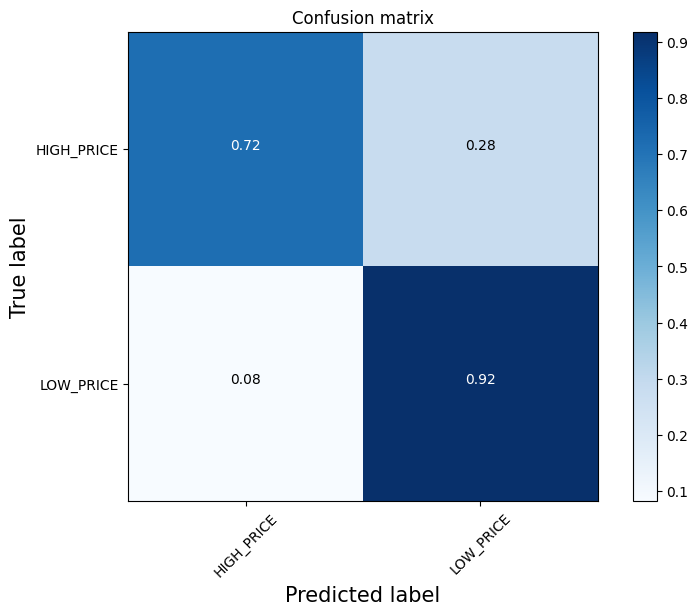

In [22]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix.
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)


# Drop rows with NaN in y_test and corresponding rows in X_test_dtm
valid_indices = ~y_test.isna()
y_test_valid = y_test[valid_indices]
X_test_dtm_valid = X_test_dtm[valid_indices]

# Print accuracy:
print("Accuracy: ", accuracy_score(y_test_valid.astype(str), y_pred_class[valid_indices].astype(str)))

# print the confusion matrix
cnf_matrix = confusion_matrix(y_test_valid, y_pred_class[valid_indices]) # Use valid data
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['HIGH_PRICE','LOW_PRICE'],normalize=True,
                      title='Confusion matrix')


# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb.predict_proba(X_test_dtm_valid)[:, 1] # Use X_test_dtm_valid here
print("ROC_AOC_Score: ", roc_auc_score(y_test_valid, y_pred_prob)) # Use y_test_valid here

At this point, we can notice that the classifier is doing poorly. Our large feature vector could be creating a lot of noise in the form of very rarely occurring features that are not useful for learning. Let us change the count vectorizer to take a certain number of features as maximum.

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 12.7 ms
Accuracy:  0.8236559139784946


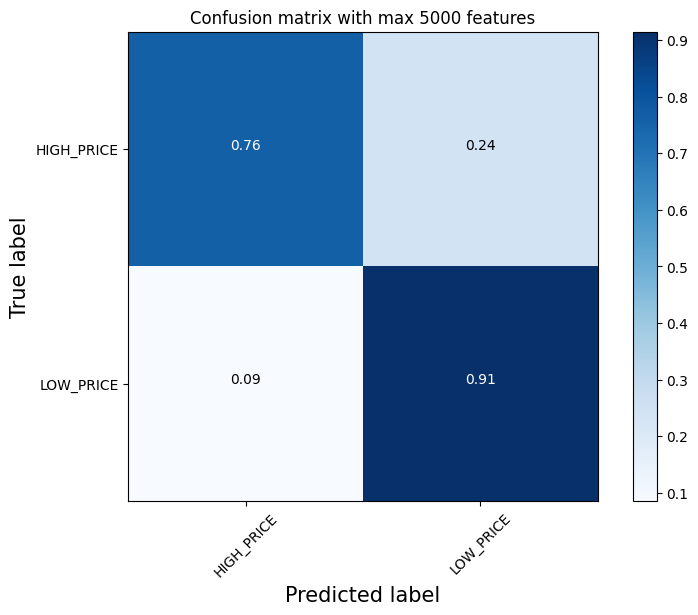

In [23]:
vect = CountVectorizer(preprocessor=clean, max_features=5000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
####%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
#y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

# changes from here
# Drop rows with NaN in y_train and corresponding rows in X_train_dtm
valid_indices = ~y_train.isna() # Use Pandas .isna() method to find NaN values
y_train_valid = y_train[valid_indices]
X_train_dtm_valid = X_train_dtm[valid_indices]
# changes unitl here...

####
# Drop rows with NaN in y_test and corresponding rows in X_test_dtm and y_pred_class
valid_indices = ~y_test.isna()
y_test_valid = y_test[valid_indices]
X_test_dtm_valid = X_test_dtm[valid_indices]
y_pred_class_valid = y_pred_class[valid_indices] # Subset y_pred_class as well


%time nb.fit(X_train_dtm_valid, y_train_valid) # train the model on data without NaN values (timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm



###print("Accuracy: ", metrics.accuracy_score(y_test_valid, y_pred_class_valid)) # Use valid data

print("Accuracy: ", metrics.accuracy_score(y_test_valid, y_pred_class_valid))
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['HIGH_PRICE','LOW_PRICE'],normalize=True,
                      title='Confusion matrix with max 5000 features')

Clearly, the performance on relevance classification got better even though the overall accuracy fell by 10%. Let us try another classification algorithm and see if the performance changes. For this experiment, we have considered logistic regression, with class_weight attribute as "balanced", to address the problem of class imbalance in this dataset.

Accuracy:  0.9053763440860215
AUC:  0.8964935064935065


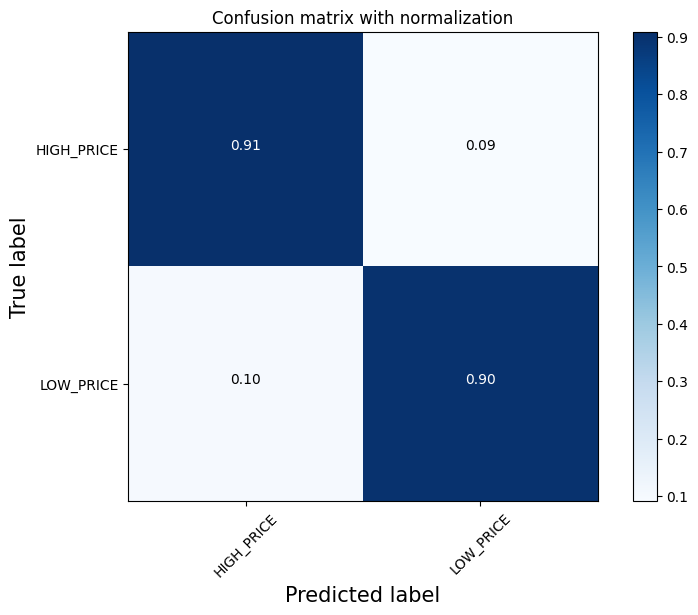

In [24]:
from sklearn.linear_model import LogisticRegression # import

# Drop rows with NaN in y_train and corresponding rows in X_train_dtm
valid_indices = ~y_train.isna()
y_train_valid = y_train[valid_indices]
X_train_dtm_valid = X_train_dtm[valid_indices]

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm_valid, y_train_valid) # fit the model with training data without NaN values

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)


# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['HIGH_PRICE','LOW_PRICE'],normalize=True,
                      title='Confusion matrix with normalization')

Let us wrap this notebook by trying with one more classifier, but reducing the feature vector size to 1000.

Accuracy:  0.875268817204301
AUC:  0.8964935064935065


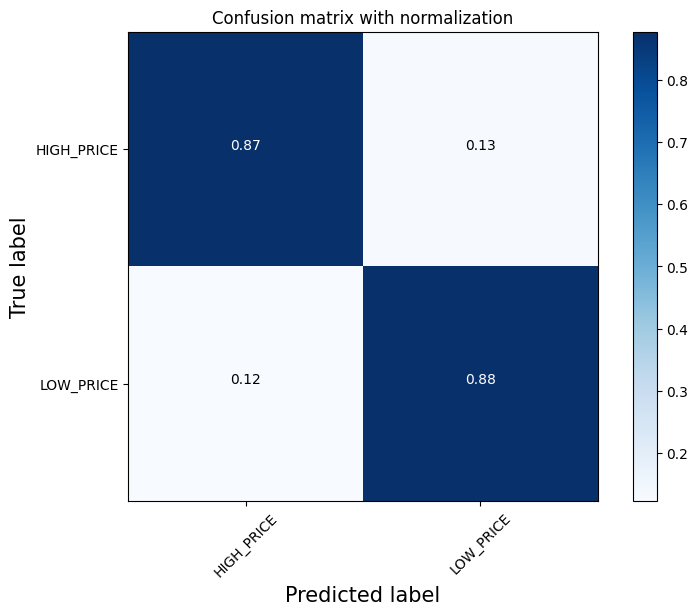

In [25]:
from sklearn.svm import LinearSVC

vect = CountVectorizer(preprocessor=clean, max_features=1000) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['HIGH_PRICE','LOW_PRICE'],normalize=True,
                      title='Confusion matrix with normalization')

So, how do we choose whats the best? If we look at overall accuracy alone, we should be choosing the very first classifier in this notebook. However, that is also doing poorly with identifying "relevant" articles. If we choose purely based on how good it is doing with "relevant" category, we should choose the second one we built. If we choose purely based on how good it is doing with "irrelevant" category, surely, nothing beats not building any classifier and just calling everything irrelevant! So, what to choose as the best among these depends on what we are looking for in our usecase!

In [26]:
!python -m spacy download en_core_web_md  # Download the required model
import spacy
from spacy.training.example import Example

# Load the pre-trained model
nlp = spacy.load("en_core_web_md")

# Add the TextCategorizer to the pipeline if it's not already there
if "textcat" not in nlp.pipe_names:
    textcat = nlp.add_pipe("textcat", last=True)
else:
    textcat = nlp.get_pipe("textcat")

# Define your labels
textcat.add_label("LOW_PRICE")
textcat.add_label("HIGH_PRICE")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


1

In [27]:
print(nlp.pipe_names) #To check it Textcat is in the nlp for checking the epochs

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'textcat']


In [28]:
# Prepare Training Data with a Default Label
# Labeled Data: Texts that belong to specific categories (LOW_PRICE, HIGH_PRICE) are labeled accordingly.
# Sample labeled data
train_data = [
    ("This car is very affordable and has low mileage.", {"cats": {"LOW_PRICE": 1, "HIGH_PRICE":0}}),
    ("The price is too high for this model.", {"cats": {"LOW_PRICE": 0, "HIGH_PRICE": 1}}),
]

In [29]:
# Convert Texts to Doc Objects and Prepare for Training
train_examples = []
for text, annotation in train_data:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annotation)
    train_examples.append(example)

In [31]:
!pip install -U spacy-lookups-data  # Update spacy-lookups-data
import spacy
from spacy.training.example import Example

# Load the pre-trained model
nlp = spacy.load("en_core_web_md")
!pip install spacy-lookups-data
#Train the model
from spacy.util import minibatch, compounding

# Disable other pipes during training to focus on the text categorizer
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "textcat"]
with nlp.disable_pipes(*other_pipes):

    # Initialize the text categorizer with a custom label
    textcat = nlp.add_pipe("textcat", last=True)
    textcat.add_label("LOW_PRICE")
    textcat.add_label("HIGH_PRICE")
    optimizer = nlp.begin_training()
    for epoch in range(10):  # Adjust the number of epochs as needed
        losses = {}
        # Shuffle and batch training data
        batches = minibatch(train_examples, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            nlp.update(batch, sgd=optimizer, drop=0.5, losses=losses)
        print(f"Losses at epoch {epoch}: {losses}")


Losses at epoch 0: {'textcat': 0.25}
Losses at epoch 1: {'textcat': 0.24765288829803467}
Losses at epoch 2: {'textcat': 0.24766358733177185}
Losses at epoch 3: {'textcat': 0.2223500907421112}
Losses at epoch 4: {'textcat': 0.25085848569869995}
Losses at epoch 5: {'textcat': 0.2211027294397354}
Losses at epoch 6: {'textcat': 0.24645289778709412}
Losses at epoch 7: {'textcat': 0.24085837602615356}
Losses at epoch 8: {'textcat': 0.24437467753887177}
Losses at epoch 9: {'textcat': 0.2113724946975708}


In [32]:
#Fine Tune the model
# Save the fine-tuned model
nlp.to_disk("fine_tuned_car_price_model")

In [33]:
#Load and use the model
#You can now load the model and classify new texts. The UNKNOWN label will be used for texts that don't fit the other categories:
# Load the fine-tuned model
# Default Label Assignment: When you have unclassified data, assign a default label (e.g., UNKNOWN) to those examples.
# Training with Mixed Data: Train the model using both classified and unclassified examples, ensuring that the unclassified data is recognized with the default label.
# Usage: After training, the model can recognize when a text doesn't fit any of the specific categories and classify it as UNKNOWN or another default label you define.
# This approach ensures that your model can handle unclassified data during both training and inference.


nlp_fine_tuned = spacy.load("fine_tuned_car_price_model")

# Test the model with a new Doc object
doc = nlp_fine_tuned("This car's price seems reasonable given its features.")
print(doc.cats)  # Outputs classification scores including 'UNKNOWN'


{'LOW_PRICE': 0.4920050799846649, 'HIGH_PRICE': 0.5079949498176575}
